In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import load_model
autoencoder1 = load_model('model/autoencoder1.h5')
autoencoder2 = load_model('model/autoencoder1binary.h5')
autoencoder3 = load_model('model/autoencoder2mse.h5')
autoencoder4 = load_model('model/autoencoder2binary.h5')

Using TensorFlow backend.


In [16]:
input_dir  = Path('input')
test = input_dir / 'test'
test_images = sorted(os.listdir(test))
print("Total number of samples in the test set: ", len(test_images))
k=test_images.index('502.jpg')
print("index no:",k)

Total number of samples in the test set:  75
index no: 57


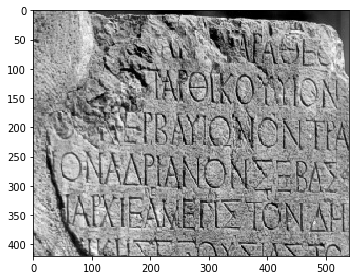

In [17]:
testin = load_img(test/ test_images[57], grayscale=True, target_size=(420,540))
testin = img_to_array(testin).astype('float32')/255
testin=testin.reshape((420,540))
imshow(testin)

In [18]:
#create patch of size 28*30 
#total no of patch from one image=270
def patch(x):
    xd=[]
    for i in range(0,393,28):
        for j in range(0,511,30):
            xd.append(x[i:i+28,j:j+30])
    xd=np.array(xd)
    return xd

def patch_restore(b):
    
    res=np.empty((0,540), np.float32)
    cur=b[0]
    for i in range(1,270):
        if i%18==0:
            res=np.append(res,cur,axis=0)
            cur=b[i]
        else:
            cur=np.append(cur,b[i],axis=1)
    res=np.append(res,cur,axis=0)
    return res  
testpatch=patch(testin)
p=np.expand_dims(testpatch, axis=3)
print('shape of patch ',p.shape)

shape of patch  (270, 28, 30, 1)


In [19]:
pred1=autoencoder1.predict(p)
pred2=autoencoder2.predict(p)
pred3=autoencoder3.predict(p)
pred4=autoencoder4.predict(p)
pred1=np.squeeze(pred1)
pred2=np.squeeze(pred2)
pred3=np.squeeze(pred3)
pred4=np.squeeze(pred4)
pred1=patch_restore(pred1)
pred2=patch_restore(pred2)
pred3=patch_restore(pred3)
pred4=patch_restore(pred4)
print(pred1.shape)

(420, 540)


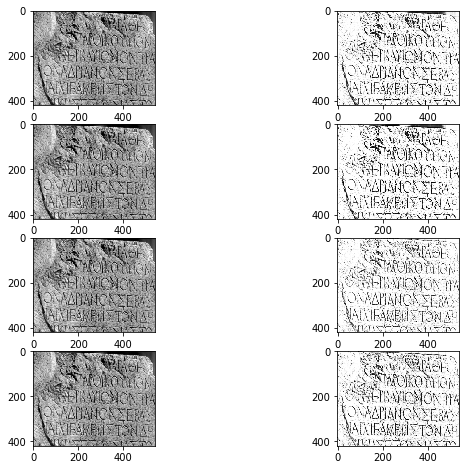

In [20]:
f, ax = plt.subplots(4,2, figsize=(10,8))
ax[0,0].imshow(testin, cmap='gray')
ax[0,1].imshow(pred1, cmap='gray')
ax[1,0].imshow(testin, cmap='gray')
ax[1,1].imshow(pred2, cmap='gray')
ax[2,0].imshow(testin, cmap='gray')
ax[2,1].imshow(pred3, cmap='gray')
ax[3,0].imshow(testin, cmap='gray')
ax[3,1].imshow(pred4, cmap='gray')
plt.show()

In [21]:
from matplotlib import image
image.imsave('output/withoutpoolin1mse.png',pred1,cmap='gray')
image.imsave('output/withoutpooling1binary.png',pred2,cmap='gray')
image.imsave('output/withpooling2mse.png',pred3,cmap='gray')
image.imsave('output/withpooling2binary.png',pred3,cmap='gray')